## Imports iniciais

In [2]:
from machinevisiontoolbox import VideoFile, colorspace_convert, Kernel
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2
from IPython.display import clear_output


## Criação da função que plota a posição do Husky

In [5]:
def plot_position(husky_contours):
    
    # Eixo X:
    xaxis = []

    # Eixo Y:
    yaxis = []
    
    # Contagem do frame
    
    frames = []
    
    frame_number = 0
    
    for cnt in husky_contours:
        
        frame_number = frame_number + 1
        frames.append(frame_number)
        
        # obtendo momento
        M = cv2.moments(cnt)

        # obtendo centroide do momento
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        
        xaxis.append(cx)
        yaxis.append(cy)

    plt.plot(frames, xaxis, label = "X do Husky")
    plt.plot(frames, yaxis, label = "Y do Husky")
    plt.legend()
    plt.show()

## Criação da função que plota a orientação do Husky

In [6]:
def plot_orientation(husky_contours):
    
    # Orientação:
    orientation = []
    
    # Contagem do frame
    
    frames = []
    
    frame_number = 0
    
    for cnt in husky_contours:
        
        frame_number = frame_number + 1
        frames.append(frame_number)
        
        # obtendo orientação da elipse equivalente
        (x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
        
        orientation.append(angle)

    plt.plot(frames, orientation, label = "Orientação do Husky")
    plt.legend()
    plt.show()

## Criação da função que plota o caminho realizado pelo Husky no plano da imagem

In [7]:
def plot_husky_path(husky_contours):

    # Path realizado pelo husky:
    husky_path = np.zeros((540, 960))
    
    for cnt in husky_contours:
        
        # obtendo momento
        M = cv2.moments(cnt)

        # obtendo centroide do momento
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        husky_path[cy][cx] = 1
        
    imgplot = plt.imshow(husky_path) # plotando a imagem de cada frame do vídeo
    plt.gray()
    plt.show()

## Execução do código para o vídeo 1

In [16]:
husky_contours = []
threshold = 170
kernel_opening = np.ones((10, 10), np.uint8)
kernel_closing = np.ones((40, 40), np.uint8)
# movie = VideoFile(filename)
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')

cap = cv2.VideoCapture('Video1_husky.mp4')
ret, frame = cap.read()
while(1):
    ret, frame = cap.read()
    if cv2.waitKey(1) & 0xFF == ord('q') or ret==False :
        cap.release()
        cv2.destroyAllWindows()
        break
    result = frame.copy()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # lower boundary RED color range values; Hue (0 - 10)
    lower1 = np.array([0, 100, 20])
    upper1 = np.array([10, 255, 255])
    
    # upper boundary RED color range values; Hue (160 - 180)
    lower2 = np.array([160,100,20])
    upper2 = np.array([179,255,255])

    lower_mask = cv2.inRange(hsv, lower1, upper1)
    upper_mask = cv2.inRange(hsv, lower2, upper2)

    full_mask = lower_mask + upper_mask
    
    ##diminuição dos ruídos brancos
    opening = cv2.morphologyEx(full_mask, cv2.MORPH_OPEN, kernel_opening)
    
    ##diminuição dos ruídos pretos
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel_closing)
    
    ## Função que encontra elementos conectados
    output = cv2.connectedComponentsWithStats(closing, 4, cv2.CV_32S)
    (numLabels, labels, stats, centroids) = output
    
    ##por inspeção, a caixa vermelha tem label == 1 quando o número de labels é igual a 4 e tem label==1 e label==2 se
    # numero de labels for maior que 4
    resultado = (labels == 1).astype(np.uint8)
    
    ## transforma matriz binária em int8: 0 a 255
    resultado*=255
    
    if(numLabels >= 5):
        resultado2 = (labels == 2).astype(np.uint8)
        resultado2*=255
        resultado = resultado + resultado2
    
    #detectando os contornos da imagem
    contours, hierarchy = cv2.findContours(resultado.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    flag_frame = False
    for cnt in contours:
        cv2.drawContours(frame, cnt, -1, (0,255,0), 3)
        husky_contours.append(cnt)
        
    cv2.imshow('result', frame)
    cv2.imshow('mask', resultado)
    

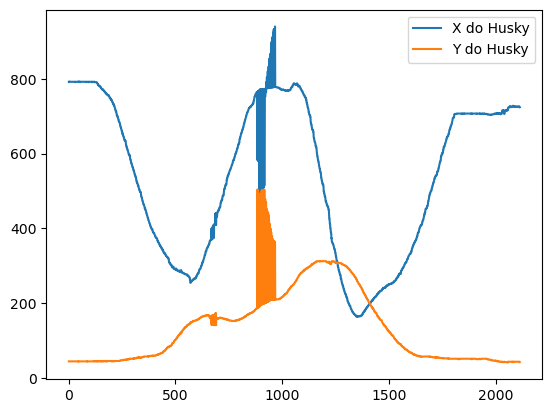

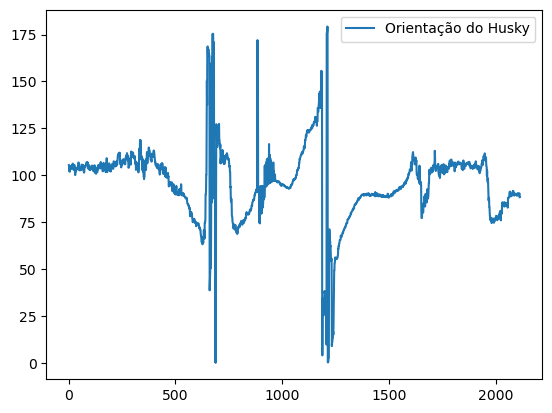

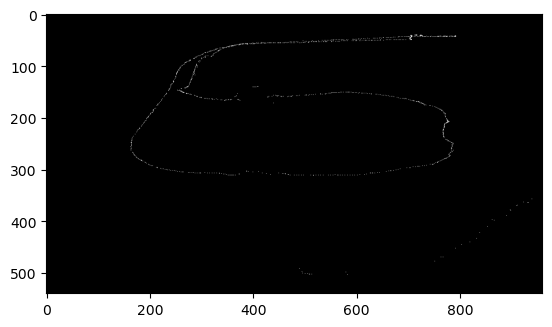

In [18]:
plot_position(husky_contours)
plot_orientation(husky_contours)
plot_husky_path(husky_contours)

## Execução do código para o vídeo 2